## 과제: 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

diabetes_data = pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## EDA 및 전처리

In [2]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes_data.loc[diabetes_data['Glucose'] == 0, 'Glucose'] = diabetes_data['Glucose'].mean()
diabetes_data.loc[diabetes_data['BloodPressure'] == 0, 'BloodPressure'] = diabetes_data['BloodPressure'].mean()
diabetes_data.loc[diabetes_data['SkinThickness'] == 0, 'SkinThickness'] = diabetes_data['SkinThickness'].mean()
diabetes_data.loc[diabetes_data['Insulin'] == 0, 'Insulin'] = diabetes_data['Insulin'].mean()
diabetes_data.loc[diabetes_data['BMI'] == 0, 'BMI'] = diabetes_data['BMI'].mean()

In [5]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

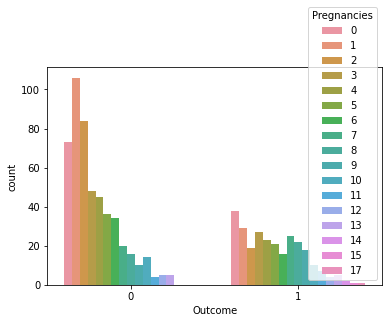

In [6]:
import seaborn as sns
sns.countplot(data=diabetes_data, x='Outcome', hue='Pregnancies')

In [7]:
diabetes_data.loc[(diabetes_data["Glucose"]>=40)&(diabetes_data["Glucose"]<60),"Glucose"]=0
diabetes_data.loc[(diabetes_data["Glucose"]>=60)&(diabetes_data["Glucose"]<80),"Glucose"]=1
diabetes_data.loc[(diabetes_data["Glucose"]>=80)&(diabetes_data["Glucose"]<100),"Glucose"]=2
diabetes_data.loc[(diabetes_data["Glucose"]>=100)&(diabetes_data["Glucose"]<120),"Glucose"]=3
diabetes_data.loc[(diabetes_data["Glucose"]>=120)&(diabetes_data["Glucose"]<140),"Glucose"]=4
diabetes_data.loc[(diabetes_data["Glucose"]>=140)&(diabetes_data["Glucose"]<160),"Glucose"]=5
diabetes_data.loc[(diabetes_data["Glucose"]>=160)&(diabetes_data["Glucose"]<180),"Glucose"]=6
diabetes_data.loc[(diabetes_data["Glucose"]>=180),"Glucose"]=7

<AxesSubplot:xlabel='Outcome', ylabel='count'>

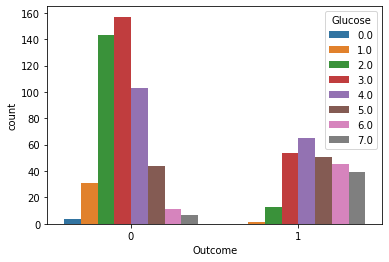

In [8]:
sns.countplot(data=diabetes_data, x='Outcome', hue='Glucose')

In [9]:
diabetes_data.loc[(diabetes_data["BloodPressure"] >=20)&(diabetes_data["BloodPressure"]<40),"BloodPressure"]=0
diabetes_data.loc[(diabetes_data["BloodPressure"] >=40)&(diabetes_data["BloodPressure"]<60),"BloodPressure"]=1
diabetes_data.loc[(diabetes_data["BloodPressure"] >=60)&(diabetes_data["BloodPressure"]<80),"BloodPressure"]=2
diabetes_data.loc[(diabetes_data["BloodPressure"] >=80)&(diabetes_data["BloodPressure"]<100),"BloodPressure"]=3
diabetes_data.loc[(diabetes_data["BloodPressure"] >=100)&(diabetes_data["BloodPressure"]<120),"BloodPressure"]=4
diabetes_data.loc[(diabetes_data["BloodPressure"] >=120),"BloodPressure"]=5

<AxesSubplot:xlabel='Outcome', ylabel='count'>

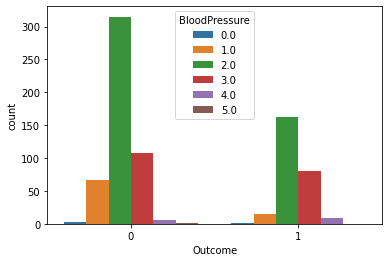

In [10]:
sns.countplot(data=diabetes_data, x='Outcome', hue='BloodPressure')

In [11]:
diabetes_data.loc[(diabetes_data["SkinThickness"] >=0)&(diabetes_data["SkinThickness"]<10),"SkinThickness"]=0
diabetes_data.loc[(diabetes_data["SkinThickness"] >=10)&(diabetes_data["SkinThickness"]<20),"SkinThickness"]=1
diabetes_data.loc[(diabetes_data["SkinThickness"] >=20)&(diabetes_data["SkinThickness"]<30),"SkinThickness"]=2
diabetes_data.loc[(diabetes_data["SkinThickness"] >=30)&(diabetes_data["SkinThickness"]<40),"SkinThickness"]=3
diabetes_data.loc[(diabetes_data["SkinThickness"] >=40)&(diabetes_data["SkinThickness"]<50),"SkinThickness"]=4
diabetes_data.loc[(diabetes_data["SkinThickness"] >=50)&(diabetes_data["SkinThickness"]<60),"SkinThickness"]=5
diabetes_data.loc[(diabetes_data["SkinThickness"] >=60)&(diabetes_data["SkinThickness"]<70),"SkinThickness"]=6
diabetes_data.loc[(diabetes_data["SkinThickness"] >=70),"SkinThickness"]=7

<AxesSubplot:xlabel='Outcome', ylabel='count'>

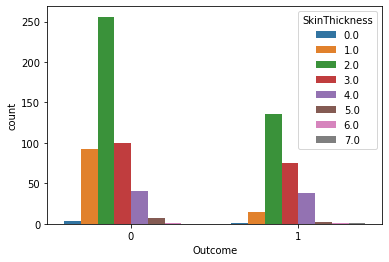

In [12]:
sns.countplot(data=diabetes_data, x='Outcome', hue='SkinThickness')

In [13]:
diabetes_data.loc[(diabetes_data["Insulin"] >=0)&(diabetes_data["Insulin"]<100),"Insulin"]=0
diabetes_data.loc[(diabetes_data["Insulin"] >=100)&(diabetes_data["Insulin"]<200),"Insulin"]=1
diabetes_data.loc[(diabetes_data["Insulin"] >=200)&(diabetes_data["Insulin"]<300),"Insulin"]=2
diabetes_data.loc[(diabetes_data["Insulin"] >=300)&(diabetes_data["Insulin"]<400),"Insulin"]=3
diabetes_data.loc[(diabetes_data["Insulin"] >=400)&(diabetes_data["Insulin"]<500),"Insulin"]=4
diabetes_data.loc[(diabetes_data["Insulin"] >=500)&(diabetes_data["Insulin"]<600),"Insulin"]=5
diabetes_data.loc[(diabetes_data["Insulin"] >=600)&(diabetes_data["Insulin"]<700),"Insulin"]=6
diabetes_data.loc[(diabetes_data["Insulin"] >=700)&(diabetes_data["Insulin"]<800),"Insulin"]=7
diabetes_data.loc[(diabetes_data["Insulin"] >=800),"Insulin"]=8

<AxesSubplot:xlabel='Outcome', ylabel='count'>

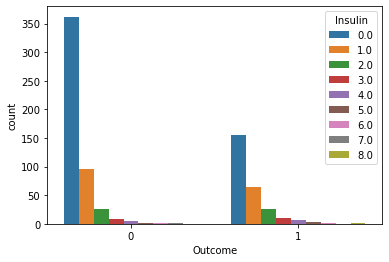

In [14]:
sns.countplot(data=diabetes_data, x='Outcome', hue='Insulin')

In [15]:
diabetes_data.loc[(diabetes_data["BMI"] >=10)&(diabetes_data["BMI"]<20),"BMI"]=0
diabetes_data.loc[(diabetes_data["BMI"] >=20)&(diabetes_data["BMI"]<30),"BMI"]=1
diabetes_data.loc[(diabetes_data["BMI"] >=30)&(diabetes_data["BMI"]<40),"BMI"]=2
diabetes_data.loc[(diabetes_data["BMI"] >=40)&(diabetes_data["BMI"]<50),"BMI"]=3
diabetes_data.loc[(diabetes_data["BMI"] >=50)&(diabetes_data["BMI"]<60),"BMI"]=4
diabetes_data.loc[(diabetes_data["BMI"] >=60),"BMI"]=5

<AxesSubplot:xlabel='Outcome', ylabel='count'>

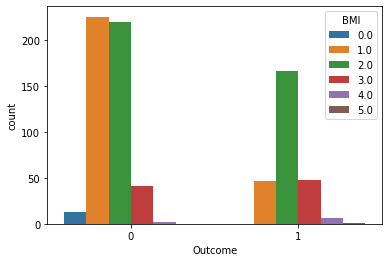

In [16]:
sns.countplot(data=diabetes_data, x='Outcome', hue='BMI')

In [17]:
diabetes_data["DiabetesPedigreeFunction"] = diabetes_data["DiabetesPedigreeFunction"] * 10

In [18]:
diabetes_data.loc[(diabetes_data["DiabetesPedigreeFunction"]>=0)&(diabetes_data["DiabetesPedigreeFunction"]<5),"DiabetesPedigreeFunction"]=0
diabetes_data.loc[(diabetes_data["DiabetesPedigreeFunction"]>=5)&(diabetes_data["DiabetesPedigreeFunction"]<10),"DiabetesPedigreeFunction"]=1
diabetes_data.loc[(diabetes_data["DiabetesPedigreeFunction"]>=10)&(diabetes_data["DiabetesPedigreeFunction"]<15),"DiabetesPedigreeFunction"]=2
diabetes_data.loc[(diabetes_data["DiabetesPedigreeFunction"]>=15)&(diabetes_data["DiabetesPedigreeFunction"]<20),"DiabetesPedigreeFunction"]=3
diabetes_data.loc[(diabetes_data["DiabetesPedigreeFunction"]>=20),"DiabetesPedigreeFunction"]=4

<AxesSubplot:xlabel='Outcome', ylabel='count'>

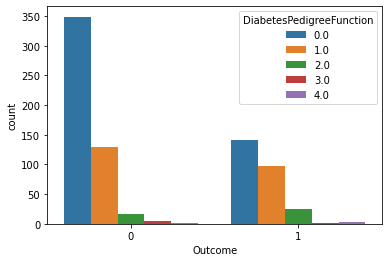

In [19]:
sns.countplot(data=diabetes_data, x='Outcome', hue='DiabetesPedigreeFunction')

In [20]:
diabetes_data.loc[(diabetes_data["Age"]>=20)&(diabetes_data["Age"]<30),"Age"]= 2
diabetes_data.loc[(diabetes_data["Age"]>=30)&(diabetes_data["Age"]<40),"Age"]= 3
diabetes_data.loc[(diabetes_data["Age"]>=40)&(diabetes_data["Age"]<50),"Age"]= 4
diabetes_data.loc[(diabetes_data["Age"]>=50)&(diabetes_data["Age"]<60),"Age"]= 5
diabetes_data.loc[(diabetes_data["Age"]>=60)&(diabetes_data["Age"]<70),"Age"]= 6
diabetes_data.loc[(diabetes_data["Age"]>=70)&(diabetes_data["Age"]<80),"Age"]= 7
diabetes_data.loc[(diabetes_data["Age"]>=80),"Age"]= 8

<AxesSubplot:xlabel='Outcome', ylabel='count'>

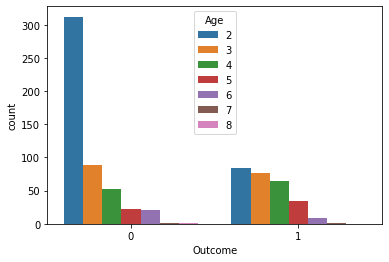

In [21]:
sns.countplot(data=diabetes_data, x='Outcome', hue='Age')

## train

In [22]:
# 피처 데이터 세트 X, 레이블 데이터 세트 y를 추출. 
# 맨 끝이 Outcome 컬럼으로 레이블 값임. 컬럼 위치 -1을 이용해 추출 
X = diabetes_data.iloc[:, :-1]
y = diabetes_data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify=y)

# 로지스틱 회귀로 학습,예측 및 평가 수행. 
lr_clf = LogisticRegression()
lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)

## 평가

In [23]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, f1_score

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix(y_test, pred) #교차행렬
    accuracy = accuracy_score(y_test , pred) #정확도
    precision = precision_score(y_test , pred) #정밀도
    recall = recall_score(y_test , pred) #재현도
    f1 = f1_score(y_test,pred) #F1스코어
    print('교차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

In [24]:
get_clf_eval(y_test, pred)

교차 행렬
[[88 12]
 [18 36]]
정확도: 0.8052, 정밀도: 0.7500, 재현율: 0.6667, F1:0.7059


In [25]:
from sklearn.metrics import roc_curve

# 레이블 값이 1일때의 예측 확률을 추출 
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)
# 샘플로 10건만 추출하되, 임곗값을 5 Step으로 추출. 
thr_index = np.arange(0, thresholds.shape[0], 5) #np.arange(시작, 끝, 간격)
print('샘플 추출을 위한 임곗값 배열의 index 10개:', thr_index)
print('샘플용 10개의 임곗값: ', np.round(thresholds[thr_index], 2))

# 5 step 단위로 추출된 임계값에 따른 FPR, TPR 값
print('샘플 임곗값별 FPR: ', np.round(fprs[thr_index], 3))
print('샘플 임곗값별 TPR: ', np.round(tprs[thr_index], 3))

샘플 추출을 위한 임곗값 배열의 index 10개: [ 0  5 10 15 20 25 30 35 40 45]
샘플용 10개의 임곗값:  [1.95 0.77 0.65 0.55 0.45 0.4  0.29 0.21 0.17 0.15]
샘플 임곗값별 FPR:  [0.   0.03 0.06 0.09 0.13 0.16 0.31 0.44 0.48 0.53]
샘플 임곗값별 TPR:  [0.    0.259 0.481 0.63  0.722 0.759 0.815 0.87  0.926 0.963]


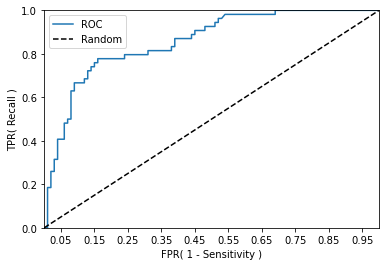

In [26]:
def roc_curve_plot(y_test , pred_proba_c1):
    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    plt.plot(fprs , tprs, label='ROC')
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);
    plt.ylim(0,1);
    plt.xlabel('FPR( 1 - Sensitivity )');
    plt.ylabel('TPR( Recall )')
    plt.legend()
    
roc_curve_plot(y_test, pred_proba_class1)

In [27]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test, pred)
print('ROC AUC 값: {0:.4f}'.format(roc_score))

ROC AUC 값: 0.7733
